# 🏀 WNBA Segmentation using `K-Means` Clustering Algorithm 

> With the WNBA Playoffs approaching us soon, I thought it would be interesting to be `2 steps ahead` and have a sneak peek of some of the awards coming up. This can be done by clustering players based on certain attributes, such as `PTS`, `AST`, `OREBS`, `DREBS` and many more 😁

<font color = blue> Glossary of terms: 
- GP Games Played
- MIN Minutes Played
- PTS Points
- FGM Field Goals Made
- FGA Field Goals Attempted
- FG% Field Goal Percentage
- 3PM 3 Point Field Goals Made
- 3PA 3 Point Field Goals Attempted
- 3P% 3 Point Field Goals Percentage
- FTM Free Throws Made
- FTA Free Throws Attempted
- FT% Free Throw Percentage
- OREB Offensive Rebounds
- DREB Defensive Rebounds
- REB Rebounds
- AST Assists
- STL Steals
- BLK Blocks
- TOV Turnovers
- EFF Efficiency

## WORKFLOW 
1. IMPORT & WRANGLE
2. VISUALISE
3. Decide on the `Optimal number of Clusters` --> `Elbow Method [WSS]` and `Silhouette Scores`
4. Profiling based on Clusters
5. Visualise 

In [1]:
# Set Dependencies 
import numpy as np 
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt # quick data visualization
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler # Standardization of Your Variables
from sklearn.cluster import KMeans # for K-Means clustering algorithm

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot") # ggplot = grammar of graphics plot

mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25 # alpha 0 [full transparency] - 1 [opaqueness]

mpl.rcParams["legend.fontsize"] = 12

In [3]:
%matplotlib inline

### Import the data 

In [4]:
wnba =\
(
    pd
    .read_csv("wnba.csv")
)

wnba # sorted according to points descending order 

,ID,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1,A'JA WILSON,37,34.4,27.0,10.2,19.6,51.9,0.5,1.6,...,7.3,84.5,2.1,9.9,12.0,2.3,1.8,2.6,1.3,34.0
1,2,NAPHEESA COLLIER,33,34.6,20.3,7.8,16.0,48.6,0.9,2.9,...,4.7,80.1,2.3,7.5,9.8,3.4,1.9,1.3,2.0,25.5
2,3,BREANNA STEWART,36,33.4,20.7,7.1,15.4,45.8,1.2,4.1,...,6.4,84.0,1.6,7.0,8.6,3.7,1.7,1.3,1.8,25.0
3,4,JONQUEL JONES,37,30.0,14.5,5.4,9.9,54.1,1.5,3.9,...,2.8,80.4,1.7,7.3,9.0,3.2,0.8,1.2,2.4,21.2
4,5,BRITTNEY GRINER,28,29.5,18.2,7.4,13.0,57.3,0.3,0.6,...,3.9,77.8,1.8,4.8,6.6,2.4,0.5,1.5,1.9,21.1
5,6,CAITLIN CLARK,39,35.8,19.5,6.2,14.7,41.7,3.1,9.0,...,4.6,90.4,0.4,5.3,5.7,8.4,1.3,0.7,5.6,21.0
6,7,NNEKA OGWUMIKE,35,32.1,16.7,6.8,13.4,50.6,0.8,2.0,...,2.6,88.0,2.0,5.6,7.6,2.4,1.9,0.5,1.3,20.9
7,8,DEARICA HAMBY,38,33.7,17.1,6.6,13.0,50.9,0.7,2.2,...,4.9,63.1,1.5,7.7,9.3,3.5,1.7,0.2,3.0,20.6
8,9,ALIYAH BOSTON,39,31.3,14.1,5.9,11.3,52.6,0.2,0.7,...,2.8,73.1,2.8,6.2,9.0,3.2,0.9,1.3,2.0,20.3
9,10,ALYSSA THOMAS,38,32.6,10.3,4.0,8.1,49.4,0.0,0.1,...,3.7,62.4,2.4,6.1,8.5,7.9,1.6,0.5,3.6,19.6


In [5]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       57 non-null     int64  
 1   PLAYER   57 non-null     object 
 2   GP       57 non-null     int64  
 3   MIN      57 non-null     float64
 4   PTS      57 non-null     float64
 5   FGM      57 non-null     float64
 6   FGA      57 non-null     float64
 7   FG%      57 non-null     float64
 8   3:00 PM  57 non-null     float64
 9   3PA      57 non-null     float64
 10  3P%      57 non-null     float64
 11  FTM      57 non-null     float64
 12  FTA      57 non-null     float64
 13  FT%      57 non-null     float64
 14  OREB     57 non-null     float64
 15  DREB     57 non-null     float64
 16  REB      57 non-null     float64
 17  AST      57 non-null     float64
 18  STL      57 non-null     float64
 19  BLK      57 non-null     float64
 20  TOV      57 non-null     float64
 21  EFF      57 non-nu

In [6]:
wnba.shape

(57, 22)

In [8]:
wnba\
    .describe()\
    .T

,count,mean,std,min,25%,50%,75%,max
ID,57.0,28.982456,16.604099,1.0,15.0,29.0,43.0,57.0
GP,57.0,36.368421,3.068455,26.0,36.0,37.0,38.0,39.0
MIN,57.0,28.921053,4.608484,20.2,25.2,29.9,32.5,38.6
PTS,57.0,13.207018,5.126781,4.5,9.6,13.6,17.1,27.0
FGM,57.0,4.817544,1.851941,1.7,3.2,4.9,6.1,10.2
FGA,57.0,10.736842,4.036248,4.0,7.2,10.8,13.4,19.6
FG%,57.0,45.110526,5.555393,34.9,41.3,45.3,49.0,57.3
3:00 PM,57.0,1.185965,0.909560,0.0,0.4,1.1,1.8,3.1
3PA,57.0,3.449123,2.521913,0.0,1.3,3.1,5.3,9.0
3P%,57.0,31.057895,9.994390,0.0,27.4,32.8,36.0,50.0


In [5]:
wnba.head(10)

,ID,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1,A'JA WILSON,37,34.4,27.0,10.2,19.6,51.9,0.5,1.6,...,7.3,84.5,2.1,9.9,12.0,2.3,1.8,2.6,1.3,34.0
1,2,NAPHEESA COLLIER,33,34.6,20.3,7.8,16.0,48.6,0.9,2.9,...,4.7,80.1,2.3,7.5,9.8,3.4,1.9,1.3,2.0,25.5
2,3,BREANNA STEWART,36,33.4,20.7,7.1,15.4,45.8,1.2,4.1,...,6.4,84.0,1.6,7.0,8.6,3.7,1.7,1.3,1.8,25.0
3,4,JONQUEL JONES,37,30.0,14.5,5.4,9.9,54.1,1.5,3.9,...,2.8,80.4,1.7,7.3,9.0,3.2,0.8,1.2,2.4,21.2
4,5,BRITTNEY GRINER,28,29.5,18.2,7.4,13.0,57.3,0.3,0.6,...,3.9,77.8,1.8,4.8,6.6,2.4,0.5,1.5,1.9,21.1
5,6,CAITLIN CLARK,39,35.8,19.5,6.2,14.7,41.7,3.1,9.0,...,4.6,90.4,0.4,5.3,5.7,8.4,1.3,0.7,5.6,21.0
6,7,NNEKA OGWUMIKE,35,32.1,16.7,6.8,13.4,50.6,0.8,2.0,...,2.6,88.0,2.0,5.6,7.6,2.4,1.9,0.5,1.3,20.9
7,8,DEARICA HAMBY,38,33.7,17.1,6.6,13.0,50.9,0.7,2.2,...,4.9,63.1,1.5,7.7,9.3,3.5,1.7,0.2,3.0,20.6
8,9,ALIYAH BOSTON,39,31.3,14.1,5.9,11.3,52.6,0.2,0.7,...,2.8,73.1,2.8,6.2,9.0,3.2,0.9,1.3,2.0,20.3
9,10,ALYSSA THOMAS,38,32.6,10.3,4.0,8.1,49.4,0.0,0.1,...,3.7,62.4,2.4,6.1,8.5,7.9,1.6,0.5,3.6,19.6


<Axes: xlabel='3P%', ylabel='PTS'>

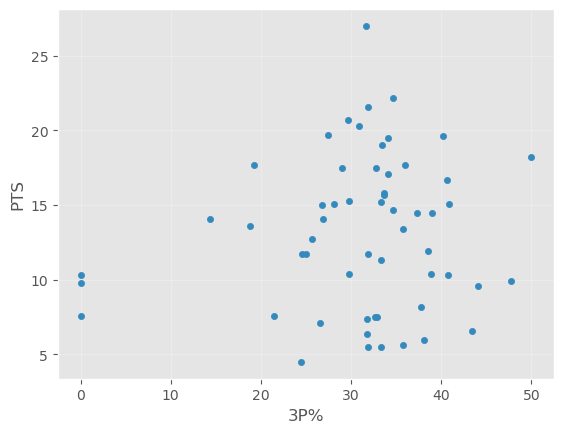

In [92]:
(
    wnba
    .plot
    .scatter(x = "3P%",
             y = "PTS")
)
# Its very clear who that outlier is standing alone at 50% 

### EDA: Transform and Visualise 

In [6]:
wnba_z =\
(
    wnba
    .copy()
)

In [7]:
wnba.columns

Index(['ID', 'PLAYER', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF'],
      dtype='object')

In [8]:
six_vars = ['PTS','OREB', 'DREB','AST','3P%','BLK']

In [13]:
wnba_z[six_vars] =\
(
    StandardScaler()
    .fit_transform(wnba_z
        [six_vars]
       )
        
)

In [15]:
#### when k is not specified 

two_attributes = ["PTS", "GP"]

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

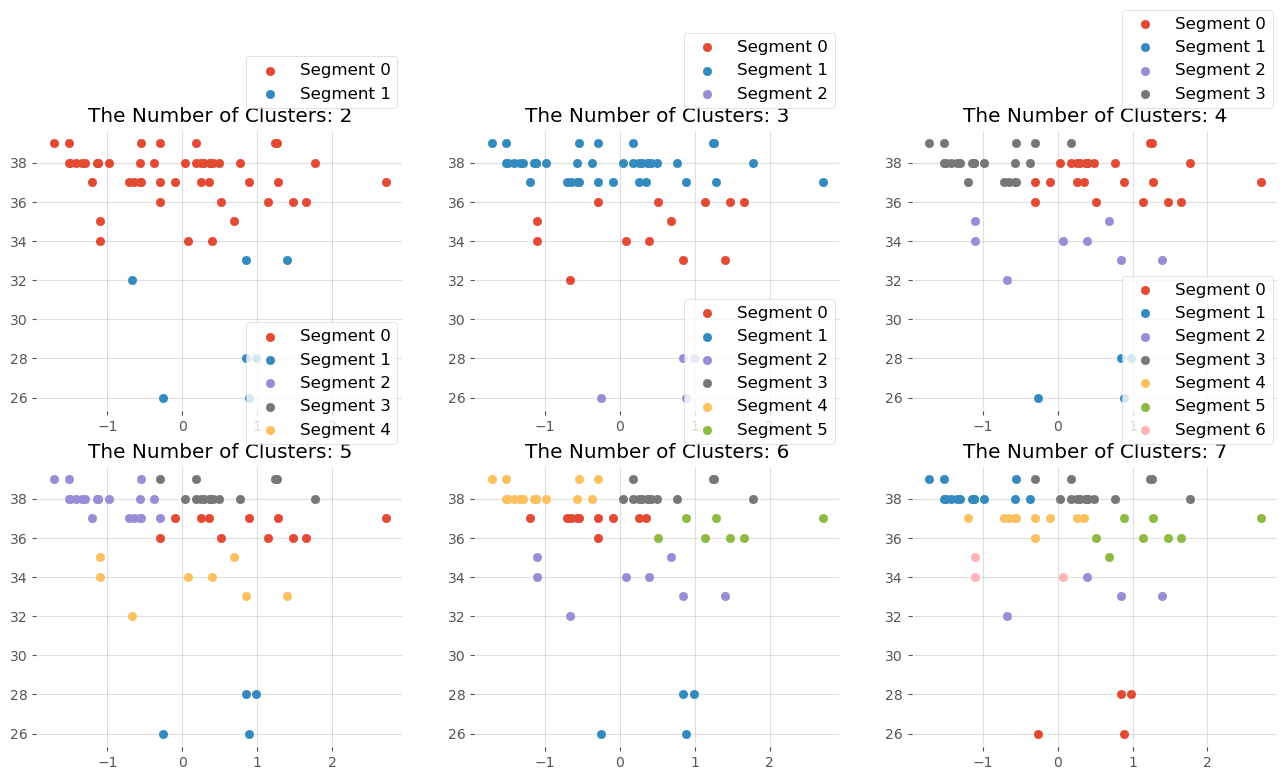

In [20]:
plt.figure(figsize = [16, 8]
          )

for k in range(2, 8):

    algo_kmeans =\
        KMeans(n_clusters = k,
               random_state = 240916)

    wnba_z["clusters"] =\
        algo_kmeans\
        .fit_predict(wnba_z
                     [two_attributes]
                    )
    
    plt.subplot(2, 3, k-1)

    for each_cluster in range(k):

        interim =\
            wnba_z[wnba_z.clusters == each_cluster]

        plt\
            .scatter(x = interim.PTS,
                     y = interim.GP,
                     label = "Segment " + str(each_cluster)
                    )
        plt\
            .title("The Number of Clusters: " + str(k)
                  )

        plt.legend(bbox_to_anchor = (0.55, 1.05)
                  )

### ELBOW 

In [21]:
k = 4

algo_searching_for_defined_k =\
    KMeans(n_clusters = k, 
           random_state = 240916)

algo_searching_for_defined_k\
    .fit(wnba_z
         [six_vars]
        ) 

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=240916)

In [22]:
algo_searching_for_defined_k\
    .inertia_

155.8727983435526

In [23]:
WSS_scores = [] # WSS denotes within-clusters sum of squares

# features_to_select = []

for k in range(2, 11): # 2 thorugh 10

    wss =\
        KMeans(n_clusters = k,
               random_state = 240916)\
        .fit(wnba_z
             [six_vars]
            )\
        .inertia_

    WSS_scores\
    .append(wss)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

In [24]:
WSS_scores

[235.1395894830198,
 191.07985321677734,
 155.8727983435526,
 136.93950601781808,
 123.9061301318666,
 109.78102393676846,
 100.7481158676197,
 87.31777119844537,
 80.97145054100274]

Text(0.5, 0, 'N. of Clusters')

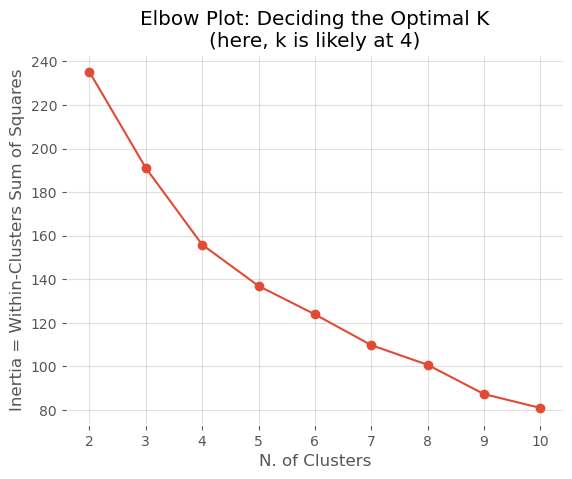

In [26]:
plt\
    .plot(range(2, 11),
          WSS_scores,
          "-o")

plt\
    .title("Elbow Plot: Deciding the Optimal K\n(here, k is likely at 4)")

plt\
    .ylabel("Inertia = Within-Clusters Sum of Squares")

plt\
    .xlabel("N. of Clusters")

### Silhouette score

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
df_for_silhouette =\
    wnba_z\
    .copy()

In [29]:
### silhouette_scores (ss)

ss = []

for k in range(2, 11):
    kmeans =\
    (
        KMeans(n_clusters = k,
               random_state = 240916)
        .fit(df_for_silhouette
             [six_vars]
            )
    )

    score =\
    (
        # sklearn
        # .metrics
        silhouette_score(df_for_silhouette[six_vars],
                         kmeans.labels_
                        )
    )

    ss.append(score)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

In [30]:
(
    pd
    .DataFrame(np.array(ss),
               columns = ["Silhouette Scores"]
              )
)

,Silhouette Scores
0,0.313932
1,0.234900
2,0.249870
3,0.233368
4,0.229784
5,0.231290
6,0.215760
7,0.229714
8,0.226276


Text(0.5, 1.0, 'Silhouette Method for Optimal Number of Clusters\n(It appears not to be cross-validated. Here k = 3)')

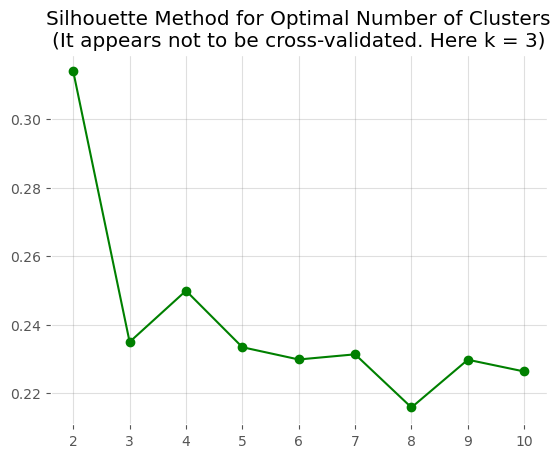

In [33]:
plt\
    .plot(range(2, 11),
          ss,
          "g-o"
         ) 

plt.title("Silhouette Method for Optimal Number of Clusters\n(It appears not to be cross-validated. Here k = 3)")

Based on above calculations, I am going with: 
- 3 clusters for offensive players : `FG%`, `Assists`, `3P%` 
- Likewise for defensive players: `BLK`, `STL`, `DREBS`

In [35]:
wnba_z =\
(
    wnba_z.drop('ID', axis=1)
)

In [36]:
wnba_z.head(2)

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,clusters
0,A'JA WILSON,37,34.4,2.714294,10.2,19.6,51.9,0.5,1.6,0.064818,...,84.5,0.949207,3.051865,12.0,-0.456859,1.8,3.843831,1.3,34.0,5
1,NAPHEESA COLLIER,33,34.6,1.395814,7.8,16.0,48.6,0.9,2.9,-0.015939,...,80.1,1.166495,1.813007,9.8,0.207760,1.9,1.362752,2.0,25.5,2


In [37]:
wnba_z.columns

Index(['PLAYER', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'EFF', 'clusters'],
      dtype='object')

In [40]:
wnba_z_OFFENCE =\
(
    wnba_z[['PLAYER','GP', 'PTS', 'MIN', 'FG%', 'AST', '3P%','clusters']]
)

In [41]:
wnba_z_OFFENCE.head(10)

,PLAYER,GP,PTS,MIN,FG%,AST,3P%,clusters
0,A'JA WILSON,37,2.714294,34.4,51.9,-0.456859,0.064818,5
1,NAPHEESA COLLIER,33,1.395814,34.6,48.6,0.207760,-0.015939,2
2,BREANNA STEWART,36,1.474529,33.4,45.8,0.389019,-0.137073,5
3,JONQUEL JONES,37,0.254443,30.0,54.1,0.086920,0.801720,4
4,BRITTNEY GRINER,28,0.982559,29.5,57.3,-0.396439,1.912121,0
5,CAITLIN CLARK,39,1.238384,35.8,41.7,3.228754,0.307087,3
6,NNEKA OGWUMIKE,35,0.687377,32.1,50.6,-0.396439,0.963233,5
7,DEARICA HAMBY,38,0.766092,33.7,50.9,0.268179,0.307087,3
8,ALIYAH BOSTON,39,0.175728,31.3,52.6,0.086920,-0.419721,3
9,ALYSSA THOMAS,38,-0.572066,32.6,49.4,2.926654,-3.135156,1


In [42]:
wnba_z_DEFENCE =\
(
    wnba_z[['PLAYER','GP', 'PTS', 'MIN', 'BLK', 'STL', 'DREB','clusters']]
)
wnba_z_DEFENCE.head(10)

,PLAYER,GP,PTS,MIN,BLK,STL,DREB,clusters
0,A'JA WILSON,37,2.714294,34.4,3.843831,1.8,3.051865,5
1,NAPHEESA COLLIER,33,1.395814,34.6,1.362752,1.9,1.813007,2
2,BREANNA STEWART,36,1.474529,33.4,1.362752,1.7,1.554912,5
3,JONQUEL JONES,37,0.254443,30.0,1.171900,0.8,1.709769,4
4,BRITTNEY GRINER,28,0.982559,29.5,1.744457,0.5,0.419292,0
5,CAITLIN CLARK,39,1.238384,35.8,0.217639,1.3,0.677387,3
6,NNEKA OGWUMIKE,35,0.687377,32.1,-0.164066,1.9,0.832245,5
7,DEARICA HAMBY,38,0.766092,33.7,-0.736623,1.7,1.916245,3
8,ALIYAH BOSTON,39,0.175728,31.3,1.362752,0.9,1.141959,3
9,ALYSSA THOMAS,38,-0.572066,32.6,-0.164066,1.6,1.090340,1


#### Use offensive players only for our analysis as I plan to plot it against PTS --> which is largely a measure for offensive players  

In [44]:
algorithm_offence =\
(
    KMeans(n_clusters = 3,
           random_state = 240916)
)
algorithm_offence

KMeans(n_clusters=3, random_state=240916)

In [46]:
offence_vars =['FG%', 'AST', '3P%']

In [48]:
algorithm_offence\
    .fit(wnba_z_OFFENCE
         [offence_vars]
        )

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=240916)

In [50]:
wnba_z_OFFENCE["offence_clusters"] =\
(
    algorithm_offence
    .predict(wnba_z_OFFENCE
             [offence_vars]
            ) 
)
wnba_z_OFFENCE

/var/folders/81/t7804j1d65n09kbsnvq5dmsc0000gn/T/ipykernel_2132/1977932936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wnba_z_OFFENCE["offence_clusters"] =\


,PLAYER,GP,PTS,MIN,FG%,AST,3P%,clusters,offence_clusters
0,A'JA WILSON,37,2.714294,34.4,51.9,-0.456859,0.064818,5,2
1,NAPHEESA COLLIER,33,1.395814,34.6,48.6,0.207760,-0.015939,2,0
2,BREANNA STEWART,36,1.474529,33.4,45.8,0.389019,-0.137073,5,0
3,JONQUEL JONES,37,0.254443,30.0,54.1,0.086920,0.801720,4,2
4,BRITTNEY GRINER,28,0.982559,29.5,57.3,-0.396439,1.912121,0,2
5,CAITLIN CLARK,39,1.238384,35.8,41.7,3.228754,0.307087,3,1
6,NNEKA OGWUMIKE,35,0.687377,32.1,50.6,-0.396439,0.963233,5,2
7,DEARICA HAMBY,38,0.766092,33.7,50.9,0.268179,0.307087,3,2
8,ALIYAH BOSTON,39,0.175728,31.3,52.6,0.086920,-0.419721,3,2
9,ALYSSA THOMAS,38,-0.572066,32.6,49.4,2.926654,-3.135156,1,0


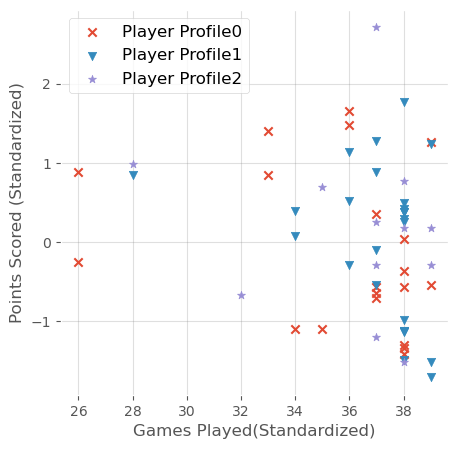

In [63]:
plt\
    .figure(figsize = [5,5])

# because the chosen value of k = 5
markers =\
    ["x",
     "v",
     "*"]

for each_cluster in range(3):

    placeholder =\
    (
        wnba_z_OFFENCE
        [wnba_z_OFFENCE.offence_clusters == each_cluster]
    )

    plt\
    .scatter(x = placeholder.GP,   # x-axis denotes one attribute from standardized data 
             y = placeholder.PTS, # y-axis
             label = "Player Profile" + str(each_cluster),
             marker = markers[each_cluster]
            ) 
plt.xlabel("Games Played(Standardized)")
plt.ylabel("Points Scored (Standardized)")


plt.legend(loc = "upper left",
           # bbox_to_anchor = (0.35, 1.05)
          )

In [65]:
wnba["offence_clusters"]=\
(
    wnba_z_OFFENCE
    .offence_clusters
)
wnba.head(6)

,ID,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,offence_clusters
0,1,A'JA WILSON,37,34.4,27.0,10.2,19.6,51.9,0.5,1.6,...,84.5,2.1,9.9,12.0,2.3,1.8,2.6,1.3,34.0,2
1,2,NAPHEESA COLLIER,33,34.6,20.3,7.8,16.0,48.6,0.9,2.9,...,80.1,2.3,7.5,9.8,3.4,1.9,1.3,2.0,25.5,0
2,3,BREANNA STEWART,36,33.4,20.7,7.1,15.4,45.8,1.2,4.1,...,84.0,1.6,7.0,8.6,3.7,1.7,1.3,1.8,25.0,0
3,4,JONQUEL JONES,37,30.0,14.5,5.4,9.9,54.1,1.5,3.9,...,80.4,1.7,7.3,9.0,3.2,0.8,1.2,2.4,21.2,2
4,5,BRITTNEY GRINER,28,29.5,18.2,7.4,13.0,57.3,0.3,0.6,...,77.8,1.8,4.8,6.6,2.4,0.5,1.5,1.9,21.1,2
5,6,CAITLIN CLARK,39,35.8,19.5,6.2,14.7,41.7,3.1,9.0,...,90.4,0.4,5.3,5.7,8.4,1.3,0.7,5.6,21.0,1


In [66]:
wnba_z_OFFENCE.columns

Index(['PLAYER', 'GP', 'PTS', 'MIN', 'FG%', 'AST', '3P%', 'clusters',
       'offence_clusters'],
      dtype='object')

In [67]:
(
    wnba
    .groupby("offence_clusters")
    [['FG%', 'AST', '3P%']]
    .mean() # cluster centers
)

,FG%,AST,3P%
offence_clusters,,,
0,46.775000,2.870,30.610
1,39.952000,3.592,32.488
2,53.083333,2.250,28.825


In [68]:
profile_of_segments_wnba =\
(
    wnba
    .groupby("offence_clusters")
    [['FG%', 'AST', '3P%']]
    .mean() # cluster centers
    .reset_index()
)
profile_of_segments_wnba

,offence_clusters,FG%,AST,3P%
0,0,46.775000,2.870,30.610
1,1,39.952000,3.592,32.488
2,2,53.083333,2.250,28.825


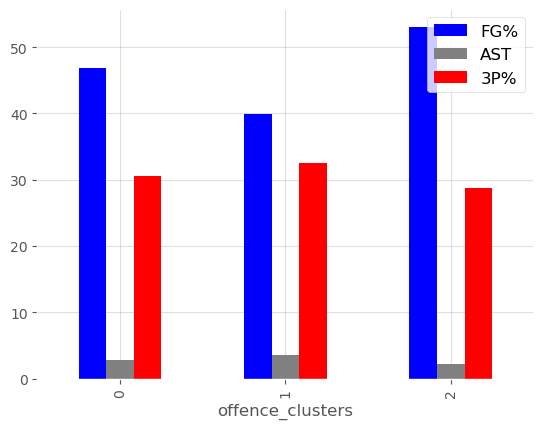

In [70]:
(
    wnba
    .groupby("offence_clusters")
    [['FG%', 'AST', '3P%']]
    .mean() # cluster centers
).plot\
    .bar(color = ["blue", "grey", "red"]
          )

plt.legend(loc = "upper right")

In [81]:
profile_of_segments_wnba_LONG =\
(
    pd
    .melt(profile_of_segments_wnba,
          id_vars = ["offence_clusters"],
          value_vars = profile_of_segments_wnba.columns[1: ]
         )
)
profile_of_segments_wnba_LONG

,offence_clusters,variable,value
0,0,FG%,46.775000
1,1,FG%,39.952000
2,2,FG%,53.083333
3,0,AST,2.870000
4,1,AST,3.592000
5,2,AST,2.250000
6,0,3P%,30.610000
7,1,3P%,32.488000
8,2,3P%,28.825000


In [83]:
np.set_printoptions(precision = 3)

# data visualisation theme 
(
    # matplotlib
    # .pyplot
    plt
    .style
    .use("ggplot") #fivethirtyeight
)

In [85]:
from lets_plot import *
LetsPlot.setup_html()

In [97]:
(
    ggplot(profile_of_segments_wnba_LONG,
           aes(x = "offence_clusters",
               y = "variable",
               fill = "value")
          ) 
    + geom_bar(stat = "identity",
               position = "dodge")
    + ggtitle("Profiling of offensive players in the WNBA")
    + theme(legend_position = "top")
)

In [73]:
from scipy.spatial import ConvexHull 

In [94]:
# Set up the color palette for the clusters
palette = sns.color_palette("hsv", len(np.unique(wnba_z_OFFENCE.columns)))

/var/folders/81/t7804j1d65n09kbsnvq5dmsc0000gn/T/ipykernel_2132/198566336.py:4: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x ='GP',


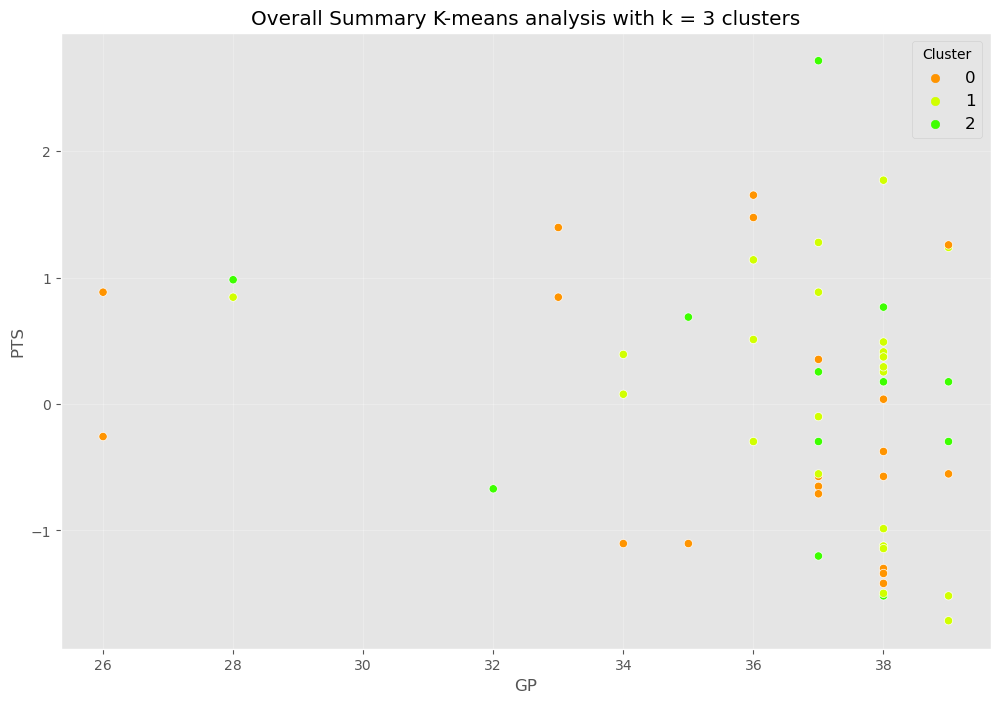

In [95]:
# Create the plot
plt.figure(figsize =(12, 8))

sns.scatterplot(x ='GP', 
                y ='PTS', 
                hue ='offence_clusters', 
                data = wnba_z_OFFENCE, 
                palette= palette, 
                legend = 'full')

plt.title('Overall Summary K-means analysis with k = 3 clusters')
plt.legend(title ='Cluster')
plt.show()

### INSIGHTS 
> Variables --> FG%', 'AST', '3P%'
- `Cluster 0`: Seems like the 3P% group. This is because the number of attempts does not directly translate to the points. There is some overlap with FG%, but for this cluster, the points increase exponentially indicated a greater numeric value for each increment (number of games played)

- `Cluster 1`: Seems more in tuned with FG%. There is greater consistency between number of games played and the points scores and largely dispersed within a linear fashion

- `Cluster 2`: Seems highly likely that this would be clustered based on Assists --> because it is largely scattered and does not have a clear 